<a href="https://colab.research.google.com/github/DGsantos14/-dgsantos.github.io/blob/master/trabalho_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeiro passo é carregar os pacotes

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')

O segundo passo é cria nosso conjunto de dados. Ele terá apenas seis observações de duas variáveis:cada linha é uma pessoa e as colunas informam os anos de estudos e a renda mensal deles.

In [0]:
estudo = [8, 8, 10, 11, 11, 14] #cria uma lista
salario = [1000, 1000, 1100, 1100, 1300, 2000]  #cria outra lista

dados = pd.DataFrame({'estudo':estudo, 'salario':salario}) #transforma as listas em um dataframe
dados


,estudo,salario
0,8,1000
1,8,1000
2,10,1100
3,11,1100
4,11,1300
5,14,2000


Agora, já podemos fazer um diagrama de dispersão para observar a relação entre o estudo e a renda.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


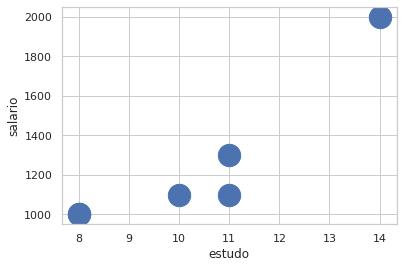

In [0]:
dados.plot.scatter('estudo', 'salario', s=500);

Para calcular a média dos salários basta usar o método .mean():

In [0]:
dados.salario.mean()

1250.0

Dado que a média é apenas:

x¯=∑i=1nxin

Poderíamos calculá-la assim:

In [0]:
dados.salario.sum() / len(dados.salario)

1250.0


Exercício
Calcule a média dos anos de estudo usando as duas maneiras mostradas acima.

In [0]:
# digite a primeira maneira aqui
dados.estudo.mean()

10.333333333333334

In [0]:
# digite a segunda maneira aqui
dados.estudo.sum() / len(dados.estudo)

10.333333333333334

Analisando a variação
Há duas maneiras de analisar a variação: grafica ou numericamente.

O histograma é o principal tipo de gráfico para avaliar a dispersão dos dados.

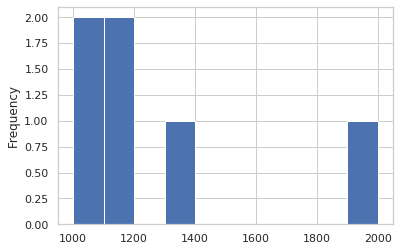

In [0]:
dados.salario.plot.hist(3)

Como temos apenas seis observações, o histograma ficou um pouco estranho. Uma alternativa é um gráfico de densidade, uma versão suavizada do histograma.

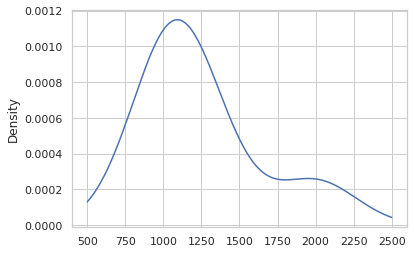

In [0]:
dados.salario.plot.kde();


Exercício
Faça o histograma e o gráfico de dispersão para os anos de estudo.


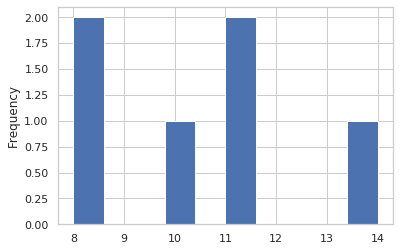

In [0]:
#digite o comando para a histagrama aqui.
dados.estudo.plot.hist();

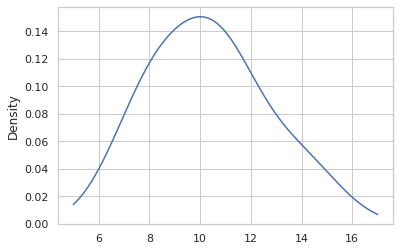

In [0]:
#digite o comando oara o gráfico de dispersão aqui.
dados.estudo.plot.kde();



Para avaliar a dispersão numericamente é importante entender a ideia de desvio médio:

a média da distância de cada um dos dados em relação à média.

O primeiro passo, portanto, é:


In [0]:
dados.salario - dados.salario.mean()

0   -250.0
1   -250.0
2   -150.0
3   -150.0
4     50.0
5    750.0
Name: salario, dtype: float64

In [0]:
(dados.salario - dados.salario.mean()) .mean()

0.0

A solução é calcular o módulo de cada uma das diferenças antes de fazer o somatório, a diferença absoluta média (mean absolute difference):

MAD=∑i=1n|xi−x¯|n
Para calculá-la basta acrescentar o método .abs() a nosso comando.


In [0]:
(dados.salario - dados.salario.mean()).abs().mean()

266.6666666666667

Na prática, usamos a função já pronta:

In [0]:
dados.salario.mad()

266.6666666666667

ontudo, a MAD não é a medida de dispersão mais usada. A variância e o desvio padrão são muito mais comuns.
Ao invés de calcularem o módulo, eles elevam os valores ao quadrado, são medidas baseadas no quadrado da diferença.

Para calculá-los, basta usar os seguintes comandos:

In [0]:
dados.salario.var()

147000.0

In [0]:
dados.salario.std()

383.40579025361626

O desvio padrão é simplesmente a raiz quadrada da variância:

In [0]:
np.sqrt(dados.salario.var())

383.40579025361626

A vantagem do desvio padrão em relação à variância é o fato de ele estar na escala dos dados.

Como você pode observar, o desvio padrão foi maior do que a MAD. Isso acontece porque, por elevar ao quadrado, ele dá maior peso aos valores mais distantes da média. Além, seu denominador é n−1, não n. Todas essas diferenças derivam de questões mais profundas de teoria estatística, relacionadas ao Teorema do Limite Central, à curva normal e ao processo de amostragem.

Aqui estão as fórmulas da variância (S2) e do desvio padrão (S):

S2=∑i=1n(xi−x¯)2n−1
S=∑i=1n(xi−x¯)2n−1−−−−−−−−−−−⎷



Exercício avançado (opcional)
Calcule a variância e o desvio padrão dos salário manualmente (isto é, usando apenas as funções básicas do python: multiplicação, divisão, raiz quadrada etc.), como fizemos acima com a média e o MAD.

In [0]:
#Cálcule manual da variância
((dados.salario - dados.salario.mean()) ** 2).sum() / (len(dados.salario) - 1)

147000.0

In [0]:
#Cálculo manual do desvio padrão
v = ((dados.salario - dados.salario.mean()) ** 2).sum() / (len(dados.salario) - 1)
v ** 0.5

383.40579025361626

Calculando a correlação
A correlação é a principal medida de variação conjunta de duas variáveis.

Basta digitar o seguinte:


In [0]:
dados.estudo.corr(dados.salario)

0.903805060585677

Para calcular a correlação entre todas as variáveis de um dataframe:

In [0]:
dados.corr()

,estudo,salario
estudo,1.000000,0.903805
salario,0.903805,1.000000
